In [36]:
import pandas as pd
import numpy as np

In [37]:
cd /Users/yunfei/Desktop/GI05/SY09/td/TP01_Manipulation_de_donnees-enonce 

/Users/yunfei/Desktop/GI05/SY09/td/TP01_Manipulation_de_donnees-enonce


# 1, Data loading

In [38]:
# sep, index_col et header
X1 = pd.read_csv("./data/sy02-p2016.csv")
X2 = pd.read_csv("./data/sy02-p2016-2.csv", sep='&')
X3 = pd.read_csv("./data/sy02-p2016-3.csv", sep='\t')
X4 = pd.read_csv("./data/sy02-p2016-4.csv", sep=';')
X5 = pd.read_csv("./data/sy02-p2016-5.csv", sep=' ', index_col=0)

In [4]:
X1.shape

(296, 11)

In [9]:
X5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 295
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nom                     296 non-null    object 
 1   specialite              296 non-null    object 
 2   niveau                  296 non-null    int64  
 3   statut                  296 non-null    object 
 4   dernier diplome obtenu  290 non-null    object 
 5   note median             293 non-null    float64
 6   correcteur median       293 non-null    object 
 7   note final              284 non-null    float64
 8   correcteur final        284 non-null    object 
 9   note totale             284 non-null    float64
 10  resultat                296 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 27.8+ KB


# 2, type convertion

In [12]:
from io import StringIO

In [33]:
f = pd.read_csv(StringIO("0\n1.4"), header=None)
f

,0
0,0.0
1,1.4


In [ ]:
pd.read_csv(StringIO("0\n1.4"), header=None).dtypes

In [32]:
pd.read_csv(StringIO("0\n1"), header=None).dtypes

0    int64
dtype: object

In [32]:
pd.read_csv(StringIO("TRUE\nFALSE"), header=None).dtypes

0    bool
dtype: object

In [31]:
pd.read_csv(StringIO("T\nF"), header=None).dtypes

0    object
dtype: object

In [33]:
pd.read_csv(StringIO("Vrai\nFALSE"), header=None).dtypes

0    object
dtype: object

In [31]:
# type correction by as type
pd.read_csv(StringIO("0\n1"), header=None).astype(bool).dtypes

0    bool
dtype: object

In [42]:
X1.dtypes

nom                        object
specialite                 object
niveau                      int64
statut                     object
dernier diplome obtenu     object
note median               float64
correcteur median          object
note final                float64
correcteur final           object
note totale               float64
resultat                   object
dtype: object

In [44]:
ects_type = pd.CategoricalDtype(categories=np.unique(X1.specialite))
ects_type

CategoricalDtype(categories=['GB', 'GI', 'GM', 'GP', 'GSM', 'GSU', 'HuTech', 'ISS', 'TC'], ordered=False)

In [63]:
X = pd.read_csv("./data/sy02-p2016.csv")
X.specialite = pd.Categorical(X.specialite) 
X.statut = pd.Categorical(X.statut)
X["dernier diplome obtenu"] = pd.Categorical(X["dernier diplome obtenu"])
correcteur_type = pd.CategoricalDtype(pd.concat([X["correcteur median"], X["correcteur final"]]).dropna().unique() )
X["correcteur median"] = X["correcteur median"].astype(correcteur_type) 
X["correcteur final"] = X["correcteur final"].astype(correcteur_type) 
X.resultat = pd.Categorical(X.resultat, categories=["ABS", "F", "Fx", "E", "D", "C", "B", "A"], ordered=True) 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   nom                     296 non-null    object  
 1   specialite              296 non-null    category
 2   niveau                  296 non-null    int64   
 3   statut                  296 non-null    category
 4   dernier diplome obtenu  290 non-null    category
 5   note median             293 non-null    float64 
 6   correcteur median       293 non-null    category
 7   note final              284 non-null    float64 
 8   correcteur final        284 non-null    category
 9   note totale             284 non-null    float64 
 10  resultat                296 non-null    category
dtypes: category(6), float64(3), int64(1), object(1)
memory usage: 15.4+ KB


# 3, Transformation

In [64]:
X.nom

0        Etu1
1        Etu2
2        Etu3
3        Etu4
4        Etu5
        ...  
291    Etu292
292    Etu293
293    Etu294
294    Etu295
295    Etu296
Name: nom, Length: 296, dtype: object

In [65]:
X.nom.str[3:]

0        1
1        2
2        3
3        4
4        5
      ... 
291    292
292    293
293    294
294    295
295    296
Name: nom, Length: 296, dtype: object

In [66]:
dir(X.nom.str)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__frozen',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_doc_args',
 '_freeze',
 '_get_series_list',
 '_inferred_dtype',
 '_is_categorical',
 '_is_string',
 '_make_accessor',
 '_orig',
 '_parent',
 '_validate',
 '_wrap_result',
 'capitalize',
 'casefold',
 'cat',
 'center',
 'contains',
 'count',
 'decode',
 'encode',
 'endswith',
 'extract',
 'extractall',
 'find',
 'findall',
 'get',
 'get_dummies',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'islower',
 'isnumeric',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'len',
 'ljust',
 'lower',
 'lstrip',
 'match',
 'normalize',
 'pad',
 'partition',
 

In [92]:
effectif = pd.read_csv("./data/effectifs.csv")
effectif

,Semestre,SY02,SY09,SY19
0,SemestreP2019,220,75.0,NaN
1,SemestreA2019,180,NaN,82.0
2,SemestreA2018,200,NaN,78.0
3,SemestreP2018,210,76.0,NaN
4,SemestreA2017,189,NaN,69.0
5,SemestreP2017,230,102.0,NaN
6,SemestreA2016,213,NaN,52.0
7,SemestreP2016,242,93.0,NaN


In [93]:
X = effectif.assign(Semestre=effectif.Semestre.str[8:])
X

,Semestre,SY02,SY09,SY19
0,P2019,220,75.0,NaN
1,A2019,180,NaN,82.0
2,A2018,200,NaN,78.0
3,P2018,210,76.0,NaN
4,A2017,189,NaN,69.0
5,P2017,230,102.0,NaN
6,A2016,213,NaN,52.0
7,P2016,242,93.0,NaN


In [94]:
X = X.assign(
    Saison=X.Semestre.str[0],
    Annee=X.Semestre.str[1:])
X.drop(columns="Semestre", inplace=True) # inplace: do changment on this data
X

,SY02,SY09,SY19,Saison,Annee
0,220,75.0,NaN,P,2019
1,180,NaN,82.0,A,2019
2,200,NaN,78.0,A,2018
3,210,76.0,NaN,P,2018
4,189,NaN,69.0,A,2017
5,230,102.0,NaN,P,2017
6,213,NaN,52.0,A,2016
7,242,93.0,NaN,P,2016


factoriser plusieurs colonnes stockant des données ayant la même signification en deux colonnes seulement : une colonne stocke le nom de la colonne et l’autre la valeur correspondante. 

In [95]:
X1 = pd.DataFrame(
    dict(
        Person=["Bob", "Alice", "Steve"],
        Age=[32, 24, 64],
        Weight=[128, 86,95],
        Height=[180, 175, 165]
    )
)
X1.melt(id_vars=["Person"])
# On peut renommer les colonnes variable et value en utilisant les arguments var_name et value_name.

,Person,variable,value
0,Bob,Age,32
1,Alice,Age,24
2,Steve,Age,64
3,Bob,Weight,128
4,Alice,Weight,86
5,Steve,Weight,95
6,Bob,Height,180
7,Alice,Height,175
8,Steve,Height,165


In [96]:
X = X.melt(id_vars=["Saison", "Annee"], value_name="effectif", var_name="UV")
X = X.loc[~pd.isna(X.effectif)]
X = X.assign(effectif=X.effectif.astype(int))


,Saison,Annee,UV,effectif
0,P,2019,SY02,220.0
1,A,2019,SY02,180.0
2,A,2018,SY02,200.0
3,P,2018,SY02,210.0
4,A,2017,SY02,189.0
5,P,2017,SY02,230.0
6,A,2016,SY02,213.0
7,P,2016,SY02,242.0
8,P,2019,SY09,75.0
11,P,2018,SY09,76.0


In [108]:
## data Iris
import seaborn as sns
iris = sns.load_dataset("iris")

In [109]:
# transform iris data to long form
iris = iris.melt(id_vars=["species"])
iris

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,petal_width,1.9
597,virginica,petal_width,2.0
598,virginica,petal_width,2.3


In [105]:
df1 = iris.variable.str.split("_", expand=True)
df1
df2 = iris.drop(columns=["variable"])
df2
pd.concat((df1, df2), axis=1)

,0,1
0,sepal,length
1,sepal,length
2,sepal,length
3,sepal,length
4,sepal,length
...,...,...
595,petal,width
596,petal,width
597,petal,width
598,petal,width


,species,value
0,setosa,5.1
1,setosa,4.9
2,setosa,4.7
3,setosa,4.6
4,setosa,5.0
...,...,...
595,virginica,2.3
596,virginica,1.9
597,virginica,2.0
598,virginica,2.3


,0,1,species,value
0,sepal,length,setosa,5.1
1,sepal,length,setosa,4.9
2,sepal,length,setosa,4.7
3,sepal,length,setosa,4.6
4,sepal,length,setosa,5.0
...,...,...,...,...
595,petal,width,virginica,2.3
596,petal,width,virginica,1.9
597,petal,width,virginica,2.0
598,petal,width,virginica,2.3


In [107]:
iris = iris.assign(
    type=iris.variable.str[:5],
    dim=iris.variable.str[6:]
)
iris = iris.drop(columns=["variable"])
iris

,species,value,type,dim
0,setosa,5.1,sepal,length
1,setosa,4.9,sepal,length
2,setosa,4.7,sepal,length
3,setosa,4.6,sepal,length
4,setosa,5.0,sepal,length
...,...,...,...,...
595,virginica,2.3,petal,width
596,virginica,1.9,petal,width
597,virginica,2.0,petal,width
598,virginica,2.3,petal,width


In [111]:
# 4, Dataset babies
babies = pd.read_csv('data/babies23.data', delimiter='\s+')
babies = babies[["wt", "gestation", "parity", "age", "ht", "wt.1", "smoke", "ed"]]
babies.columns = ["bwt", "gestation", "parity", "age", "height", "weight", "smoke", "education"]
babies

,bwt,gestation,parity,age,height,weight,smoke,education
0,120,284,1,27,62,100,0,5
1,113,282,2,33,64,135,0,5
2,128,279,1,28,64,115,1,2
3,123,999,2,36,69,190,3,5
4,108,282,1,23,67,125,1,5
...,...,...,...,...,...,...,...,...
1231,113,275,0,27,60,100,0,5
1232,128,265,1,24,67,120,0,5
1233,130,291,4,30,65,150,1,2
1234,125,281,0,21,65,110,0,4


In [113]:
from matplotlib import pyplot as plt

(array([  13., 1195.,   15.,    0.,    0.,    0.,    0.,    0.,    0.,
          13.]),
 array([148. , 233.1, 318.2, 403.3, 488.4, 573.5, 658.6, 743.7, 828.8,
        913.9, 999. ]),
 <a list of 10 Patch objects>)

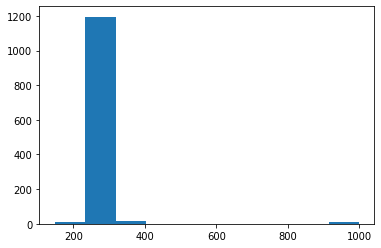

In [115]:
plt.hist(babies.gestation)
plt.show()

In [119]:
babies.loc[babies.bwt == 999, 'bwt'] = np.nan 
babies.loc[babies.gestation == 999, 'gestation'] = np.nan 
babies.loc[babies.age == 99, 'age'] = np.nan 
babies.loc[babies.height == 99, 'height'] = np.nan 
babies.loc[babies.weight == 999, 'weight'] = np.nan 
babies.loc[babies.smoke == 9, 'smoke'] = np.nan 
babies.loc[babies.education == 9, 'education'] = np.nan 
babies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   bwt        1236 non-null   float64 
 1   gestation  1223 non-null   float64 
 2   parity     1236 non-null   int64   
 3   age        1234 non-null   float64 
 4   height     1214 non-null   float64 
 5   weight     1200 non-null   float64 
 6   smoke      1236 non-null   category
 7   education  1235 non-null   float64 
dtypes: category(1), float64(6), int64(1)
memory usage: 69.0 KB


In [120]:
mask = (babies.smoke == 1)  
babies.loc[mask, 'smoke'] = 'Smoking'
babies.loc[~mask, 'smoke'] = 'NonSmoking' 
babies.smoke = babies.smoke.astype('category') 
babies.smoke

0       NonSmoking
1       NonSmoking
2       NonSmoking
3       NonSmoking
4       NonSmoking
           ...    
1231    NonSmoking
1232    NonSmoking
1233    NonSmoking
1234    NonSmoking
1235    NonSmoking
Name: smoke, Length: 1236, dtype: category
Categories (2, object): [NonSmoking, Smoking]